# Importações e Estruturação dos Dados

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [140]:
def insere_id(dataframe):
    dataframe.insert(0, 'ID', list(range(1,len(dataframe) +1)))

In [141]:
#As bases de dados se referem a estatísticas diferentes, entretanto se referem ao mesmo conjunto de dados com os mesmos agrupamentos
#De toda forma, um ID é inserido a cada um dos dataframes separadamente
#Feito isso, todos são unidos em um único dataframe a fim de facilitar os códigos.

df_daily_mean = pd.read_csv("..\Dados\DailyMean.csv")
df_daily_median= pd.read_csv("..\Dados\DailyMedian.csv")
df_daily_median.drop(columns=['rownumber'],inplace=True)
df_daily_min_max = pd.read_csv("..\Dados\DailyMinMax.csv")
df_base = pd.read_csv("..\Dados\Base.csv")

insere_id(df_daily_mean)
insere_id(df_daily_median)
insere_id(df_daily_min_max)

df_daily_measures = pd.merge(df_daily_mean, df_daily_median, how = 'inner', on = ['ID','TestDay','TestMonth','TestYear','ServerSite'])
df_daily_measures = pd.merge(df_daily_measures, df_daily_min_max, how = 'inner', on = ['ID','TestDay','TestMonth','TestYear','ServerSite'])

df_daily_measures.head()

,ID,TestDay,TestMonth,TestYear,DailyAverageMeanThroughputMbps,DailyAverageMinRTTDay,DailyAverageLossRate,ServerSite,date,DailyMedianMeanThroughputMbps,DailyMedianLossRate,DailyMedianMinRTTDay,DailyMinMeanThroughputMbps,DailyMinMinRTTDay,DailyMinLossRate,DailyMaxMeanThroughputMbps,DailyMaxMinRTTDay,DailyMaxLossRate
0,1,17,6,2020,1.823248,207.05400,0.012515,gru03,2020-06-17,1.823248,0.012515,207.0540,1.823248,207.054,0.012515,1.823248,207.054,0.012515
1,2,9,7,2020,32.864398,14.01550,0.010798,gru01,2020-07-09,37.681778,0.011827,14.4040,8.011241,12.000,0.004386,48.082792,15.254,0.015151
2,3,9,7,2020,41.497518,13.78860,0.080651,gru02,2020-07-09,49.890066,0.027612,14.7630,1.595871,11.024,0.008192,73.433080,16.986,0.272115
3,4,9,7,2020,57.038192,14.37450,0.050736,gru03,2020-07-09,57.038192,0.050736,14.3745,35.327219,13.086,0.025079,78.749165,15.663,0.076393
4,5,10,7,2020,50.476502,12.42425,0.007441,gru01,2020-07-10,49.660492,0.003494,12.1040,11.808759,9.946,0.000416,90.776263,15.543,0.022358


In [142]:
df_base.head()

,date,DayOfWeek,Day,Month,Year,TestTime,ClientIP,Site,MeanThroughputMbps,MinRTT,LossRate
0,2020-06-17,4,17,6,2020,2020-06-17 00:19:28.814256 UTC,177.107.231.137,gru03,1.823248,207.054,0.012515
1,2020-07-09,5,9,7,2020,2020-07-09 00:09:20.262623 UTC,189.84.248.63,gru03,35.327219,13.086,0.025079
2,2020-07-09,5,9,7,2020,2020-07-09 12:11:40.526203 UTC,2804:5bc:9040:1a00:9431:572d:b3ae:3d43,gru01,8.011241,15.254,0.004386
3,2020-07-09,5,9,7,2020,2020-07-09 11:22:54.022211 UTC,2804:5bc:9040:1a00:9431:572d:b3ae:3d43,gru02,49.890066,14.763,0.082514
4,2020-07-09,5,9,7,2020,2020-07-09 14:00:08.704276 UTC,2804:5bc:9040:1a00:9431:572d:b3ae:3d43,gru01,45.359066,14.243,0.015151


# Análise

##  Número de testes realizados ao longo do tempo 

Verificando a quantidade de medidas por dia, pode-se observar que existem alguns dias com uma quantidade incomum de acessos.

Observando no gráfico vemos dois dias com acessos muito maiores que os outros, sabendo disso pode-se verificar quais dias são esses e o quanto são maiores que os outros.

Dias: 2021-09-30 e 2021-03-03 com 1186 e 866 medidas realizadas.

Além disso, muitos valores estão acima do 75 percentil, como podemos observar no boxplot acima. E, para facilitar a observações os dias com mais de 300 medidas foram removidos do dataframe para uma melhor visualização.

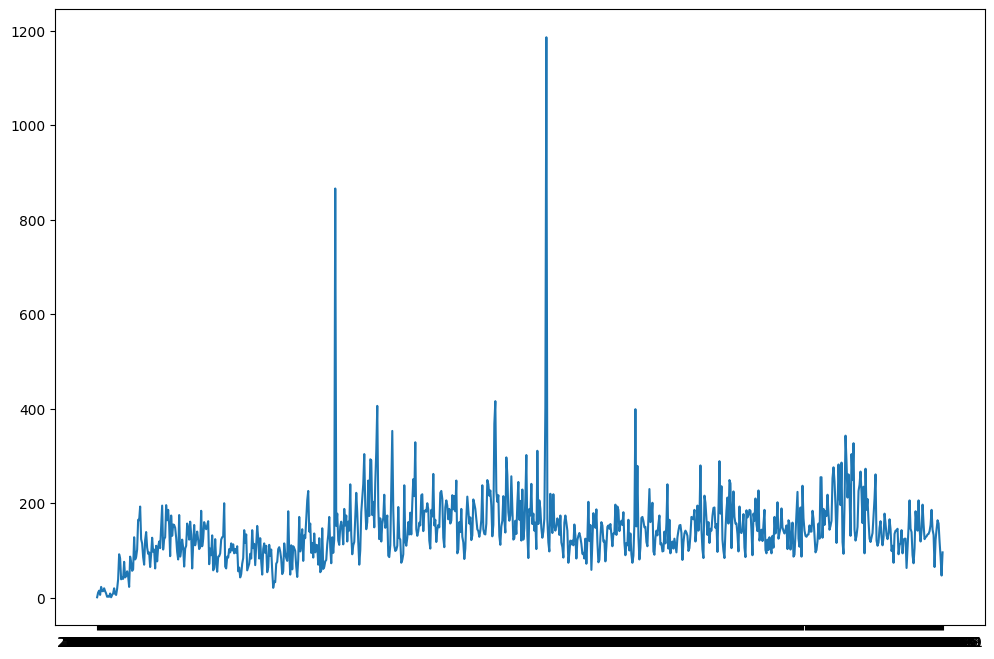

In [143]:
x = df_base.date.value_counts(sort=False).index
y = df_base.date.value_counts(sort=False)

plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.show()
plt.close()

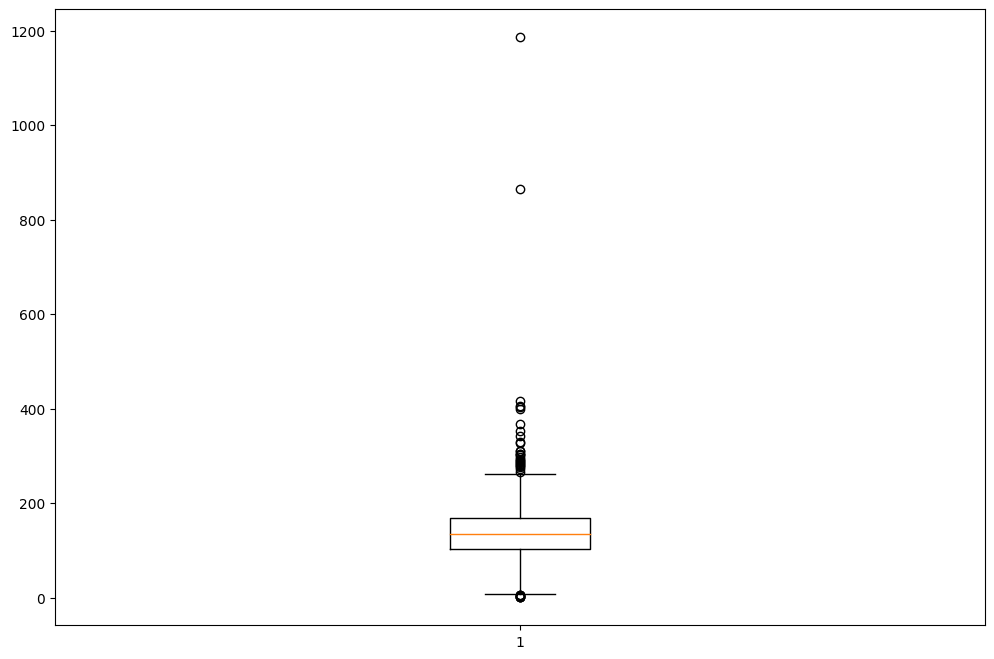

In [144]:
plt.figure(figsize=(12,8))
plt.boxplot(y)
plt.show()
plt.close()

In [145]:
df_base.date.value_counts()

2021-09-30    1186
2021-03-03     866
2021-08-10     416
2021-04-14     406
2021-09-29     404
              ... 
2020-07-19       3
2020-07-18       2
2020-07-20       2
2020-07-22       1
2020-06-17       1
Name: date, Length: 846, dtype: int64

In [146]:
df_base.Year.value_counts()

2021    57617
2022    46449
2020    16488
Name: Year, dtype: int64

Sem esses outliers, pode-se observar que houve uma tendência ao aumento de medidas e ainda assim existem dias com muito mais acessos que outros

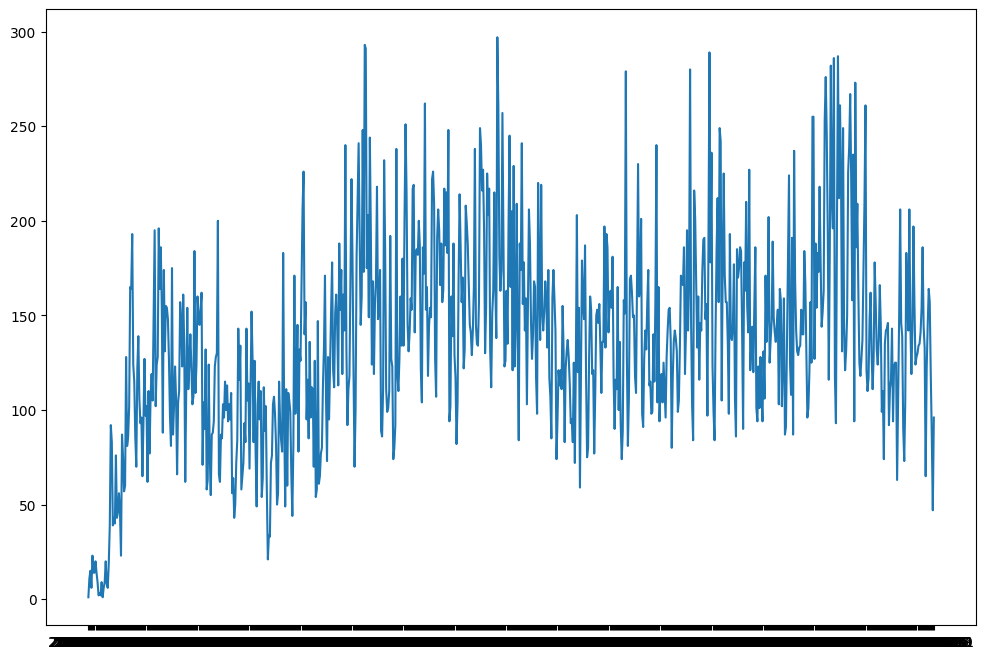

In [147]:
quantidade = dict(df_base.date.value_counts())
df_base['DailyMeasures'] = df_base['date']
df_base['DailyMeasures'] = df_base.DailyMeasures.map(quantidade)
df_base_red_outlier = df_base.drop(df_base.loc[df_base['DailyMeasures'] >= 300].index)

x = df_base_red_outlier.date.value_counts(sort=False).index
y = df_base_red_outlier.date.value_counts(sort=False)

plt.figure(figsize=(12,8))
plt.plot(x,y)
plt.show()
plt.close()

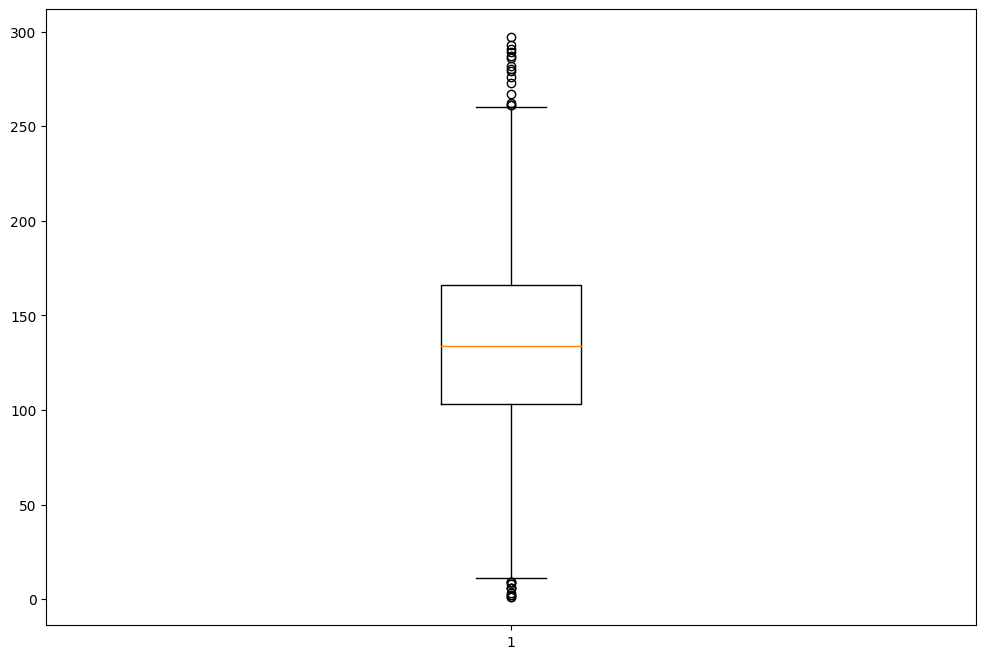

In [148]:
plt.figure(figsize=(12,8))
plt.boxplot(y)
plt.show()
plt.close()

Os dois dias com menor quantidade de acessos se dá no final de semana, enquanto a maior quatidade de acessos se dá no meio da semana, Quarta-Feira

In [149]:
weekday_dict = {1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5: 'Thursday', 6:'Friday', 7:'Saturday'}
weekday_measures = pd.DataFrame(df_base.DayOfWeek.value_counts()).reset_index()
weekday_measures.rename(columns = {'index':'Weekday', 'DayOfWeek': 'Measures'}, inplace= True)
weekday_measures.Weekday = weekday_measures.Weekday.map(weekday_dict)
weekday_measures.sort_values(by = 'Measures', ascending= False)

,Weekday,Measures
0,Wednesday,19885
1,Thursday,19867
2,Tuesday,18859
3,Friday,17450
4,Monday,17097
5,Saturday,14854
6,Sunday,12542


## Comparação com o site do servidor de teste

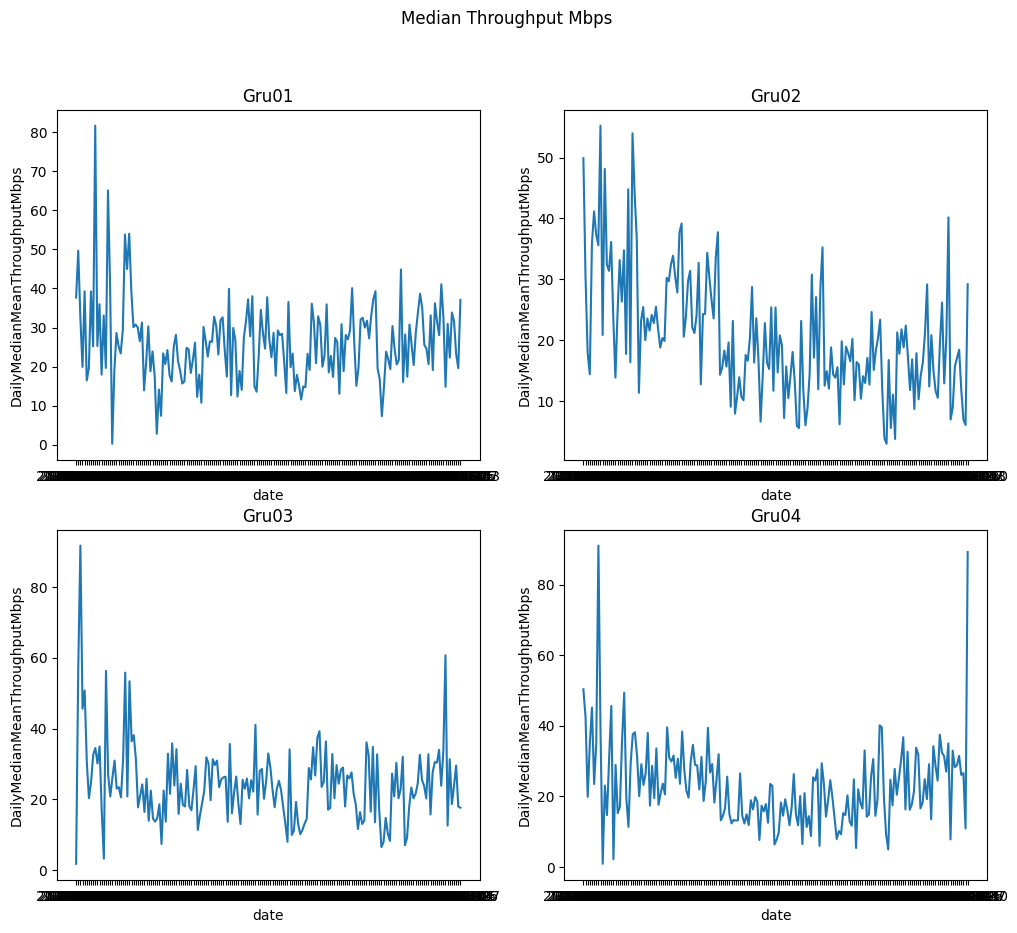

In [150]:
fig, axes = plt.subplots(2,2, figsize = (12,10))
fig.suptitle('Median Throughput Mbps')

sns.lineplot(ax = axes[0][0], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru01').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru01').DailyMedianMeanThroughputMbps)

sns.lineplot(ax = axes[0][1], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru02').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru02').DailyMedianMeanThroughputMbps)

sns.lineplot(ax = axes[1][0], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru03').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru03').DailyMedianMeanThroughputMbps)

sns.lineplot(ax = axes[1][1], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru04').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru04').DailyMedianMeanThroughputMbps)

axes[0][0].set_title('Gru01')
axes[0][1].set_title('Gru02')
axes[1][0].set_title('Gru03')
axes[1][1].set_title('Gru04')

plt.show()



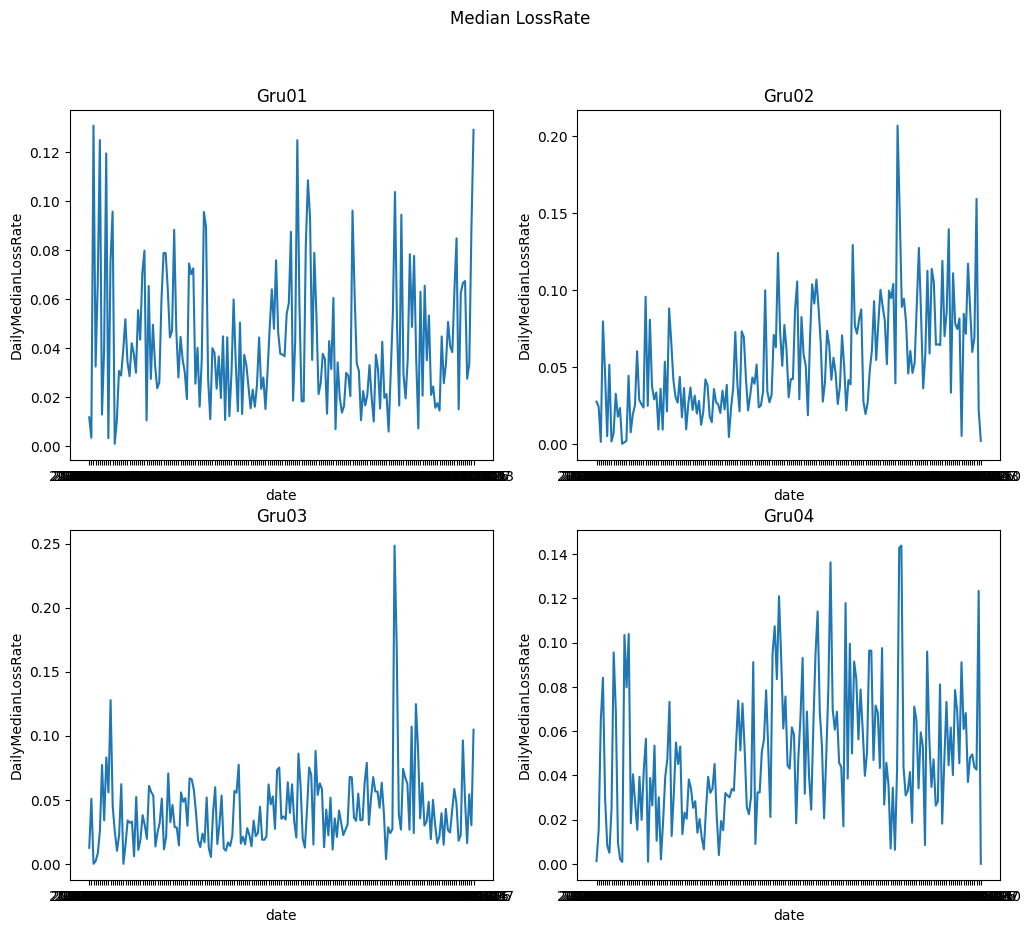

In [151]:
fig, axes = plt.subplots(2,2, figsize = (12,10))
fig.suptitle('Median LossRate')

sns.lineplot(ax = axes[0][0], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru01').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru01').DailyMedianLossRate)

sns.lineplot(ax = axes[0][1], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru02').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru02').DailyMedianLossRate)

sns.lineplot(ax = axes[1][0], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru03').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru03').DailyMedianLossRate)

sns.lineplot(ax = axes[1][1], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru04').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru04').DailyMedianLossRate)

axes[0][0].set_title('Gru01')
axes[0][1].set_title('Gru02')
axes[1][0].set_title('Gru03')
axes[1][1].set_title('Gru04')

plt.show()

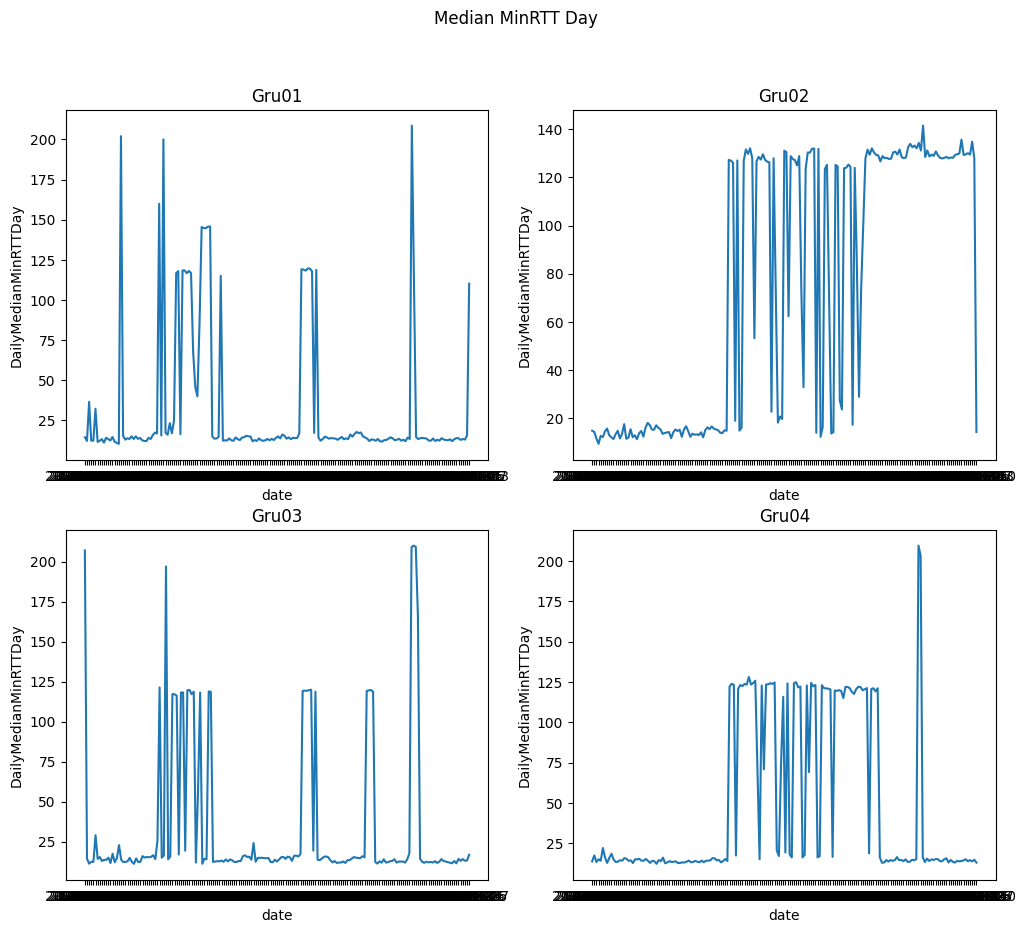

In [152]:
fig, axes = plt.subplots(2,2, figsize = (12,10))
fig.suptitle('Median MinRTT Day')

sns.lineplot(ax = axes[0][0], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru01').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru01').DailyMedianMinRTTDay)

sns.lineplot(ax = axes[0][1], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru02').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru02').DailyMedianMinRTTDay)

sns.lineplot(ax = axes[1][0], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru03').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru03').DailyMedianMinRTTDay)

sns.lineplot(ax = axes[1][1], x = df_daily_measures.where(df_daily_measures.ServerSite == 'gru04').date, 
             y = df_daily_measures.where(df_daily_measures.ServerSite == 'gru04').DailyMedianMinRTTDay)

axes[0][0].set_title('Gru01')
axes[0][1].set_title('Gru02')
axes[1][0].set_title('Gru03')
axes[1][1].set_title('Gru04')

plt.show()